In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X = pd.read_csv("C:/Users/KIIT/Desktop/Assignment2/logisticX (1).csv")  
y = pd.read_csv("C:/Users/KIIT/Desktop/Assignment2/logisticY.csv") 

In [5]:
X = X.values
y = y.values.reshape(-1, 1)

In [7]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (99, 2)
Shape of y: (99, 1)


In [9]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

In [11]:
X = np.hstack((np.ones((X.shape[0], 1)), X))  
print("New Shape of X after adding bias:", X.shape)

New Shape of X after adding bias: (99, 3)


In [13]:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost Function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient Descent Function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(X @ theta)
        gradient = (1/m) * (X.T @ (h - y))  # Gradient calculation
        theta -= alpha * gradient  # Update parameters

        # Store cost function value
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # Print cost every 10 iterations for tracking
        if i % 10 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return theta, cost_history


In [15]:
# Initialize theta (parameters) to zeros
theta = np.zeros((X.shape[1], 1))

# Set learning rate and iterations
alpha = 0.1
iterations = 1000

# Train model
theta_optimal, cost_history = gradient_descent(X, y, theta, alpha, iterations)

# Print final cost function value
print(f"Final Cost Function Value: {cost_history[-1]}")
print(f"Optimized Theta Values:\n{theta_optimal}")


Iteration 0: Cost = 0.6703199764101024
Iteration 10: Cost = 0.5150088581409018
Iteration 20: Cost = 0.4346978349468895
Iteration 30: Cost = 0.3872514537039076
Iteration 40: Cost = 0.35619321309128665
Iteration 50: Cost = 0.33434225835940523
Iteration 60: Cost = 0.3181540013700825
Iteration 70: Cost = 0.3056923380112893
Iteration 80: Cost = 0.2958131625585831
Iteration 90: Cost = 0.2877974480221473
Iteration 100: Cost = 0.28117059961989527
Iteration 110: Cost = 0.27560664130308943
Iteration 120: Cost = 0.2708741956170742
Iteration 130: Cost = 0.26680444256141655
Iteration 140: Cost = 0.2632712873246196
Iteration 150: Cost = 0.26017863155124116
Iteration 160: Cost = 0.25745194498697754
Iteration 170: Cost = 0.2550325313819877
Iteration 180: Cost = 0.2528735336842113
Iteration 190: Cost = 0.2509370919962942
Iteration 200: Cost = 0.24919228359597403
Iteration 210: Cost = 0.24761360468697033
Iteration 220: Cost = 0.24617983447854208
Iteration 230: Cost = 0.2448731736815755
Iteration 240: Co

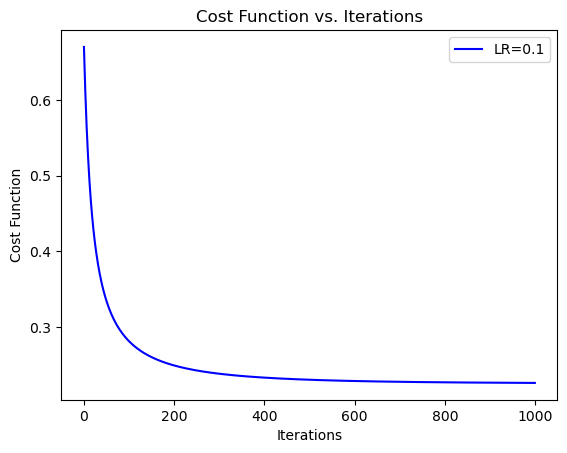

In [17]:
plt.plot(range(len(cost_history)), cost_history, label="LR=0.1", color="blue")
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function vs. Iterations")
plt.legend()
plt.show()


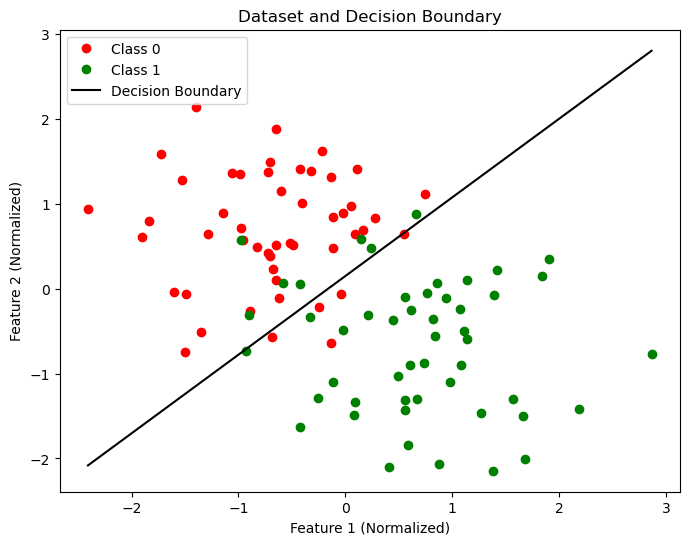

In [25]:
plt.figure(figsize=(8, 6))

# Class 0 (Red) and Class 1 (Green)
plt.plot(X[:, 1][y.flatten() == 0], X[:, 2][y.flatten() == 0], 'ro', label="Class 0")
plt.plot(X[:, 1][y.flatten() == 1], X[:, 2][y.flatten() == 1], 'go', label="Class 1")

# Decision boundary (y = -(θ0 + θ1x1) / θ2)
x_values = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
y_values = -(theta_optimal[0] + theta_optimal[1] * x_values) / theta_optimal[2]
plt.plot(x_values, y_values, label="Decision Boundary", color="black")

plt.xlabel("Feature 1 (Normalized)")
plt.ylabel("Feature 2 (Normalized)")
plt.legend()
plt.title("Dataset and Decision Boundary")
plt.show()


Iteration 0: Cost = 0.6703199764101024
Iteration 10: Cost = 0.5150088581409018
Iteration 20: Cost = 0.4346978349468895
Iteration 30: Cost = 0.3872514537039076
Iteration 40: Cost = 0.35619321309128665
Iteration 50: Cost = 0.33434225835940523
Iteration 60: Cost = 0.3181540013700825
Iteration 70: Cost = 0.3056923380112893
Iteration 80: Cost = 0.2958131625585831
Iteration 90: Cost = 0.2877974480221473
Iteration 0: Cost = 0.24766587584971164
Iteration 10: Cost = 0.22721041820534932
Iteration 20: Cost = 0.22566939441709416
Iteration 30: Cost = 0.2254056021055607
Iteration 40: Cost = 0.22535065354483
Iteration 50: Cost = 0.22533829153610602
Iteration 60: Cost = 0.22533541344059252
Iteration 70: Cost = 0.2253347325206661
Iteration 80: Cost = 0.22533457017803574
Iteration 90: Cost = 0.22533453132796438


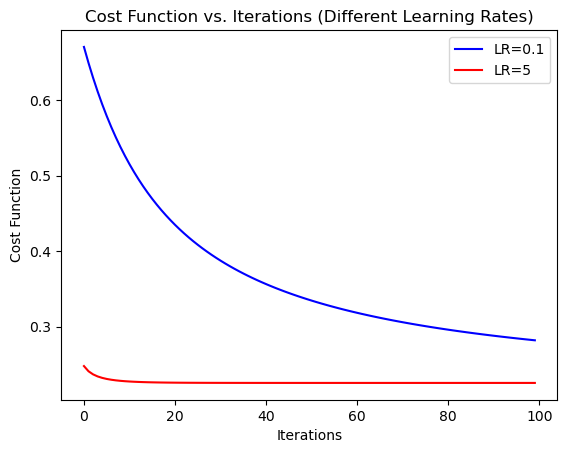

In [21]:
# Train models with different learning rates
alpha_1 = 0.1
alpha_2 = 5
iterations = 100

theta_1, cost_history_1 = gradient_descent(X, y, np.zeros((X.shape[1], 1)), alpha_1, iterations)
theta_2, cost_history_2 = gradient_descent(X, y, np.zeros((X.shape[1], 1)), alpha_2, iterations)

# Plot both learning rates
plt.plot(range(iterations), cost_history_1, label="LR=0.1", color="blue")
plt.plot(range(iterations), cost_history_2, label="LR=5", color="red")
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function vs. Iterations (Different Learning Rates)")
plt.legend()
plt.show()


Iteration 0: Cost = 0.6703199764101024
Iteration 10: Cost = 0.5150088581409018
Iteration 20: Cost = 0.4346978349468895
Iteration 30: Cost = 0.3872514537039076
Iteration 40: Cost = 0.35619321309128665
Iteration 50: Cost = 0.33434225835940523
Iteration 60: Cost = 0.3181540013700825
Iteration 70: Cost = 0.3056923380112893
Iteration 80: Cost = 0.2958131625585831
Iteration 90: Cost = 0.2877974480221473
Iteration 0: Cost = 0.24766587584971164
Iteration 10: Cost = 0.22721041820534932
Iteration 20: Cost = 0.22566939441709416
Iteration 30: Cost = 0.2254056021055607
Iteration 40: Cost = 0.22535065354483
Iteration 50: Cost = 0.22533829153610602
Iteration 60: Cost = 0.22533541344059252
Iteration 70: Cost = 0.2253347325206661
Iteration 80: Cost = 0.22533457017803574
Iteration 90: Cost = 0.22533453132796438


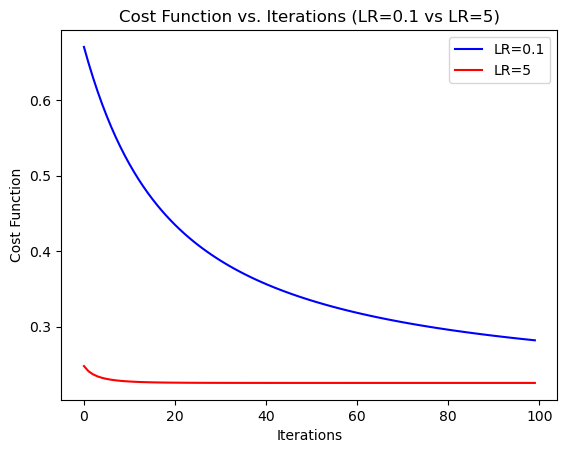

In [27]:
# Train models for 100 iterations
theta_1, cost_history_1 = gradient_descent(X, y, np.zeros((X.shape[1], 1)), 0.1, 100)
theta_2, cost_history_2 = gradient_descent(X, y, np.zeros((X.shape[1], 1)), 5, 100)

# Plot cost functions
plt.plot(range(100), cost_history_1, label="LR=0.1", color="blue")
plt.plot(range(100), cost_history_2, label="LR=5", color="red")
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function vs. Iterations (LR=0.1 vs LR=5)")
plt.legend()
plt.show()


In [23]:
# Predict probabilities and classify (threshold = 0.5)
y_pred = sigmoid(X @ theta_optimal) >= 0.5

# Compute Confusion Matrix
TP = np.sum((y_pred == 1) & (y == 1))  # True Positives
TN = np.sum((y_pred == 0) & (y == 0))  # True Negatives
FP = np.sum((y_pred == 1) & (y == 0))  # False Positives
FN = np.sum((y_pred == 0) & (y == 1))  # False Negatives

conf_matrix = np.array([[TP, FP], [FN, TN]])
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy, precision, recall, F1-score
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")


Confusion Matrix:
[[43  5]
 [ 7 44]]
Accuracy: 0.8788
Precision: 0.8958
Recall: 0.8600
F1 Score: 0.8776
